In [39]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Cat&DogIMG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Cat&DogIMG/dog_test.jpg
/content/drive/MyDrive/Cat&DogIMG/cat_test.jpg
/content/drive/MyDrive/Cat&DogIMG/monkey.jpg
/content/drive/MyDrive/Cat&DogIMG/cat_test2.png
/content/drive/MyDrive/Cat&DogIMG/anjingkucing.jpg
/content/drive/MyDrive/Cat&DogIMG/anjing_masak.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1521-WIRED-Cat.jpeg
/content/drive/MyDrive/Cat&DogIMG/Cat/000122_ZV_SCSW_HeroImages_1900x1024_D1.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1200px-RedCat_8727.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/00tb-cats1-videoSixteenByNine3000.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1_5978274.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1181276-tortoise-shell-cat-on-garden-chair-banner_990x350.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/07CAT-STRIPES-superJumbo.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1200px-Cat03.jpg
/content/drive/MyDrive/Cat&DogIMG/Cat/1169131-two-cats-outside-banner_990x35

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import imghdr

%matplotlib inline

In [42]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Cat&DogIMG')

Found 1152 files belonging to 2 classes.


In [43]:
data_iterator = data.as_numpy_iterator()

In [44]:
batch = data_iterator.next()

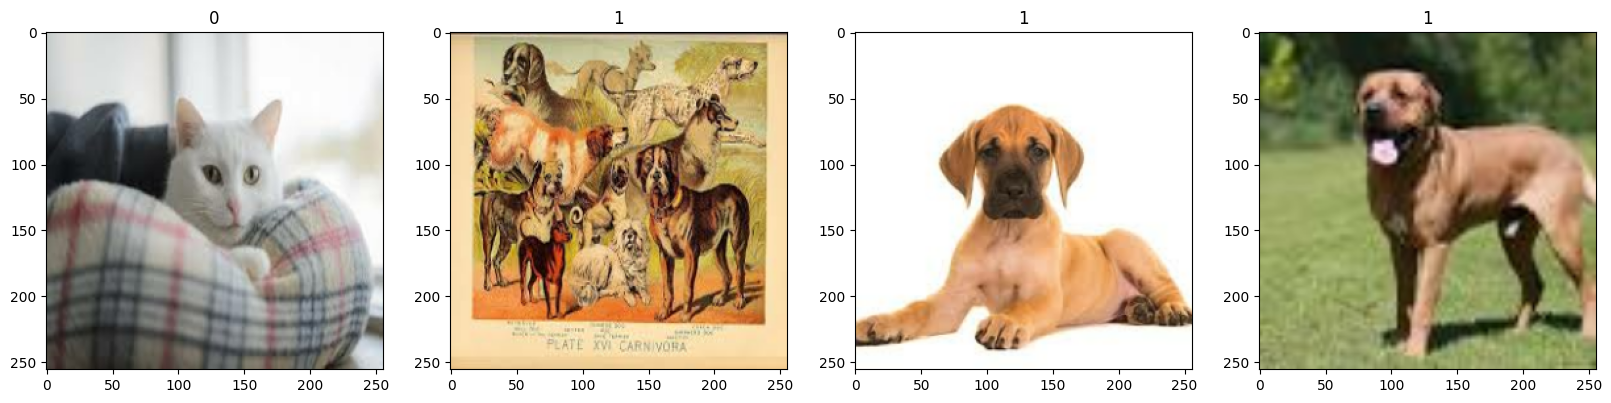

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [46]:
data = data.map(lambda x,y: (x/255, y))

In [47]:
data.as_numpy_iterator().next()

(array([[[[3.64866734e-01, 2.94278502e-01, 2.39376530e-01],
          [3.69109988e-01, 2.98521757e-01, 2.43619785e-01],
          [3.73353243e-01, 3.02765012e-01, 2.47863054e-01],
          ...,
          [6.11764729e-01, 5.05882382e-01, 4.00000006e-01],
          [6.08325660e-01, 5.02443314e-01, 3.96560967e-01],
          [6.07843161e-01, 5.01960814e-01, 3.96078438e-01]],
 
         [[3.64866734e-01, 2.94278502e-01, 2.39376530e-01],
          [3.69109988e-01, 2.98521757e-01, 2.43619785e-01],
          [3.73353243e-01, 3.02765012e-01, 2.47863054e-01],
          ...,
          [6.11764729e-01, 5.05882382e-01, 4.00000006e-01],
          [6.08325660e-01, 5.02443314e-01, 3.96560967e-01],
          [6.07843161e-01, 5.01960814e-01, 3.96078438e-01]],
 
         [[3.64866734e-01, 2.94278502e-01, 2.39376530e-01],
          [3.69109988e-01, 2.98521757e-01, 2.43619785e-01],
          [3.73353243e-01, 3.02765012e-01, 2.47863054e-01],
          ...,
          [6.11764729e-01, 5.05882382e-01, 4.0000

In [48]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [49]:
train_size

25

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [51]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(64, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(128, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(256, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
#model.add(Conv2D(512, (3,3), 1, activation='relu', padding = 'same'))
#model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,204,529 (16.04 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
logdir='logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])
print(hist.history) # this will print a dictionary object, now you need to grab the metrics / score you're looking for

# if your score == 'acc', if not replace 'acc' with your metric

best_score = max(hist.history['val_accuracy'])

print(f"Best Validation score is: {best_score}")

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4967 - loss: 1.1677 - val_accuracy: 0.6161 - val_loss: 0.6863
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.5656 - loss: 0.6803 - val_accuracy: 0.6384 - val_loss: 0.6606
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.6329 - loss: 0.6640 - val_accuracy: 0.6295 - val_loss: 0.6263
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.6813 - loss: 0.6092 - val_accuracy: 0.7545 - val_loss: 0.5061
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.7252 - loss: 0.5257 - val_accuracy: 0.7991 - val_loss: 0.4759
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8487 - loss: 0.4092 - val_accuracy: 0.8482 - val_loss: 0.4188
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.8714 - loss: 0.3175 - val_accuracy: 0.8839 - val_loss: 0.3441
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9329 - loss: 0.2009 - val_accuracy: 0.8795 - val_loss:

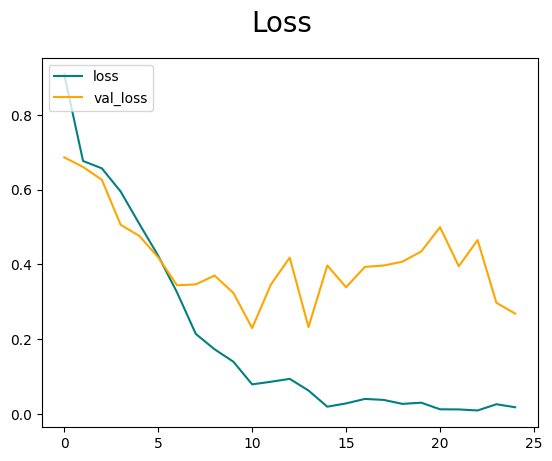

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

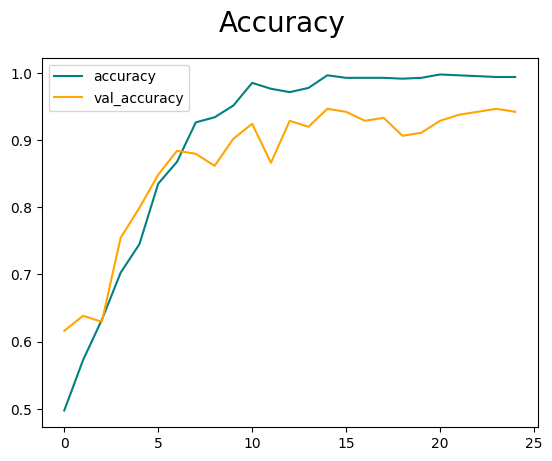

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [62]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


In [65]:
print(f"Precision: {pre.result().numpy()} , Recall: {re.result().numpy()}, BinaryAccuracy: {acc.result().numpy()}")

Precision: 0.9107142686843872 , Recall: 0.9807692170143127, BinaryAccuracy: 0.9375


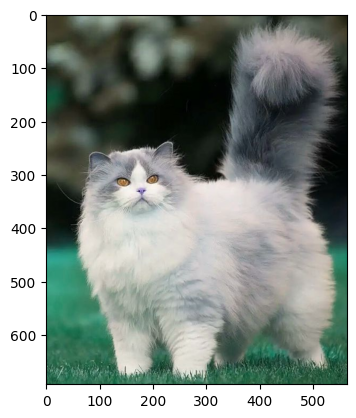

In [71]:
img = cv2.imread('/content/drive/MyDrive/Cat&DogIMG/cat_test.jpg')
plt.imshow(img)
plt.show()

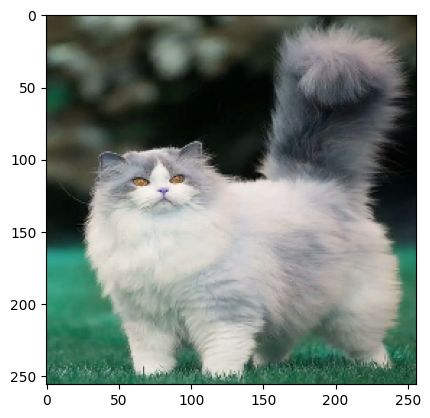

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [74]:
yhat

array([[0.01137955]], dtype=float32)

In [75]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat
